In [1]:
import argparse
from dataclasses import dataclass

import torch
from models.Shapelet import ShapeBottleneckModel

from data_provider.data_loader import UEAloader

import matplotlib.pyplot as plt

import numpy as np
from pycatch22 import catch22_all
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
@dataclass
class Config:
    epsilon: float = 1.0
    distance_func: str = 'euclidean'
    memory_efficient: bool = True
    seq_len: int = 50
    enc_in: int = 28
    num_class: int = 2
    pool: str = 'max'
    sbm_cls: str = 'linear'
    dropout: float = 0.0
    lambda_div: float = 0.1
    lambda_reg: float = 0.1

In [3]:
config = Config()

path_large = 'checkpoints/SBM/FingerMovements/dnn-FCN_seed-0_k-10_div-0.1_reg-0.1_eps-1.0_beta-constant_dfunc-euclidean_cls-linear'
path_small = 'checkpoints/SBM/FingerMovements/dnn-FCN_seed-0_k-7_div-0.1_reg-0.1_eps-1.0_beta-constant_dfunc-euclidean_cls-linear'

# model_small = ShapeBottleneckModel(num_shapelet=[7, 7, 7, 7, 7, 7], shapelet_len=[0.05, 0.1, 0.2, 0.3, 0.5, 0.8], pool='max', configs=config).eval()
# model_small.load_state_dict(torch.load(f"{path_small}/checkpoint.pth"))
                            
model_large =  ShapeBottleneckModel(num_shapelet=[10, 10, 10, 10, 10, 10], shapelet_len=[0.05, 0.1, 0.2, 0.3, 0.5, 0.8], pool='max', configs=config).eval()
model_large.load_state_dict(torch.load(f"{path_large}/checkpoint.pth"))

<All keys matched successfully>

In [61]:
shapelets = []
for i in range(5):
    sh = model_large.shapelets[i].weights
    for j in range(10):
        for ch in range(28):
            shapelets.append(sh[j, ch, :].cpu().detach().numpy())

In [62]:
len(shapelets)

1400

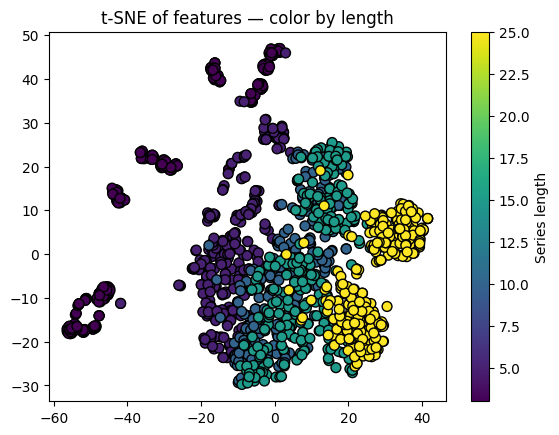

In [63]:
def z_norm(x):
    s = x.std()
    return (x - x.mean())/s if s > 0 else x*0

Xn = [z_norm(x) for x in shapelets]
feat = np.vstack([catch22_all(x)['values'] for x in Xn])
lengths = np.array([len(x) for x in Xn])[:, None]
F = feat
scaler = StandardScaler()
Z = scaler.fit_transform(F)

Y = TSNE(perplexity=30, random_state=0).fit_transform(Zp)
plt.figure()
sc = plt.scatter(Y[:,0], Y[:,1], c=lengths.ravel(), s=50, edgecolor='k', cmap="viridis")
plt.colorbar(sc, label="Series length")
# for i, lab in enumerate(labels):
#     if lab == -1: plt.scatter(Y[i,0], Y[i,1], s=80, facecolors='none', edgecolors='r')  # highlight noise
plt.title("t-SNE of features — color by length")
plt.show()

In [64]:
ids = np.argwhere((Y[:, 0] < -40) & (Y[:, 1] < 0)).flatten()
print(len(ids))

92


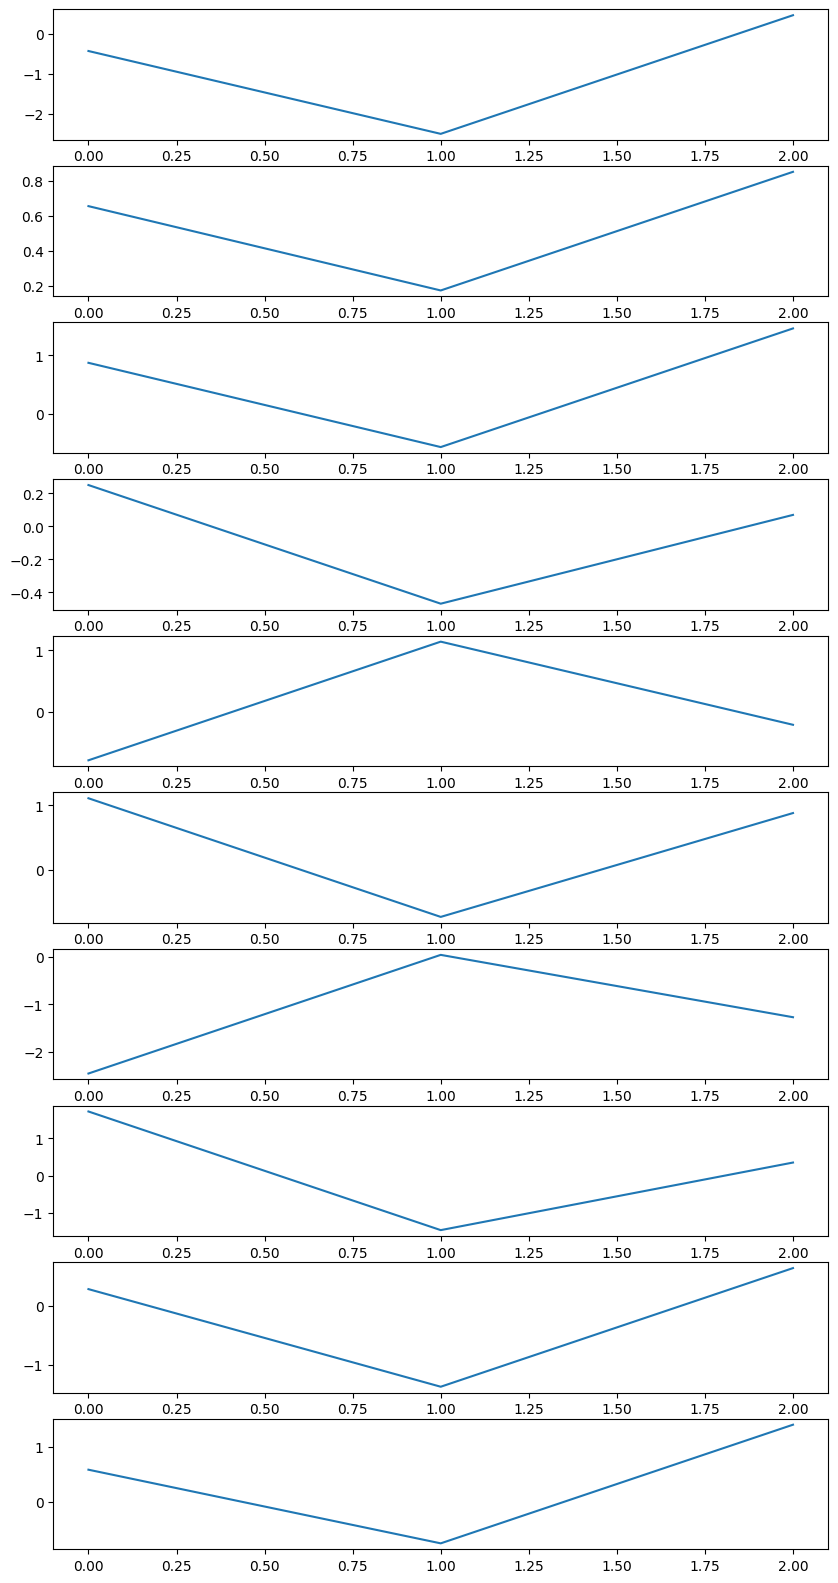

In [65]:
fig, axs = plt.subplots(10, 1, figsize=(10, 2 * 10))
for num, i in enumerate(ids[:10]):
    axs[num].plot(range(len(shapelets[i])), shapelets[i])
plt.show()

83


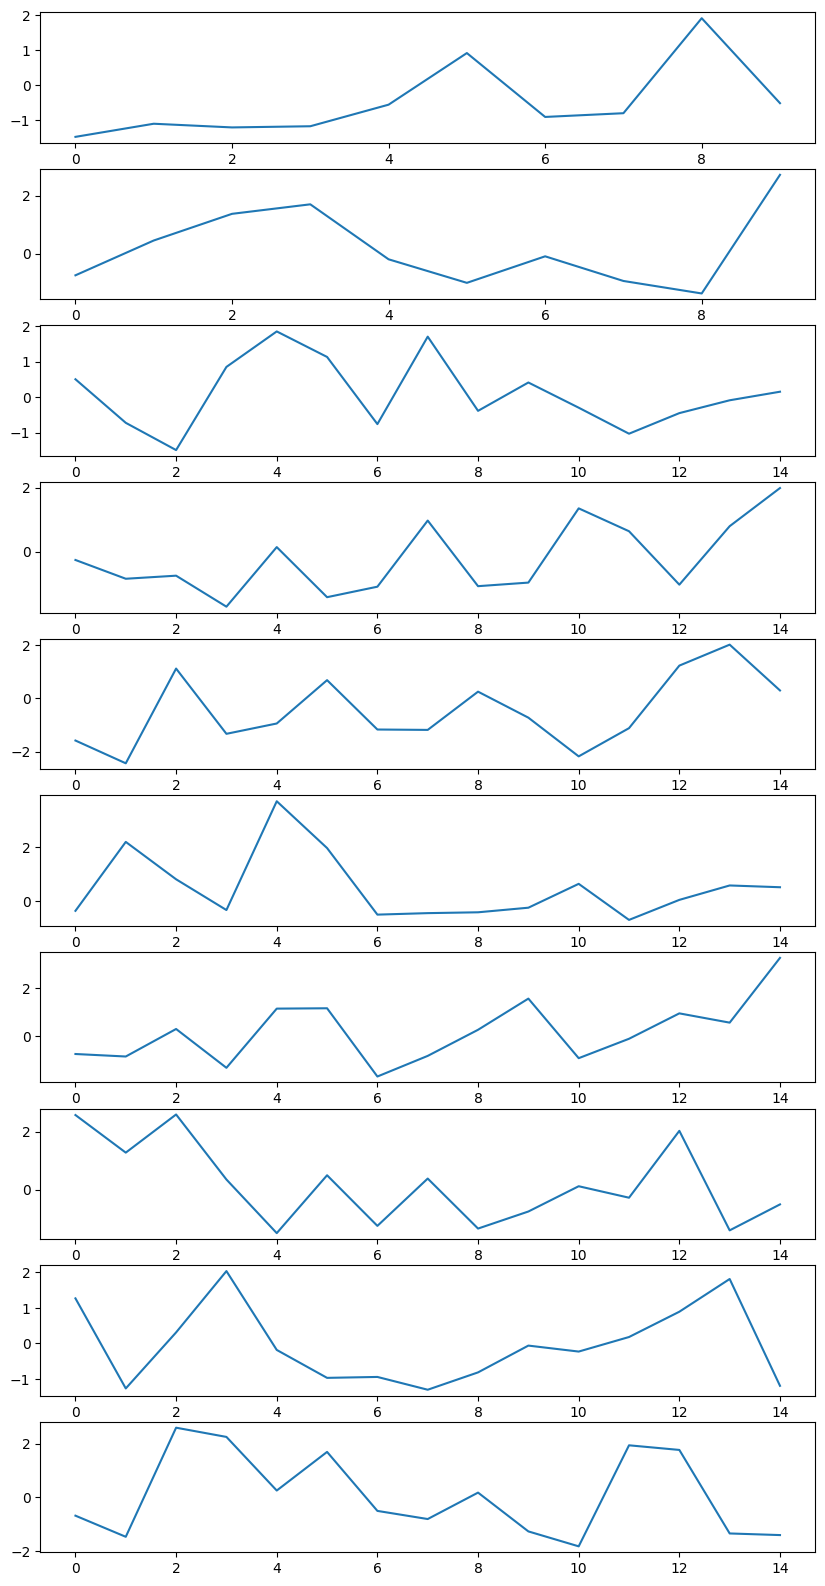

In [66]:
ids = np.argwhere((Y[:, 0] > 20) & (Y[:, 1] < 15) & (Y[:, 1] > 5)).flatten()
print(len(ids))

fig, axs = plt.subplots(10, 1, figsize=(10, 2 * 10))
for num, i in enumerate(ids[:10]):
    axs[num].plot(range(len(shapelets[i])), shapelets[i])
plt.show()

total 300 shapelets


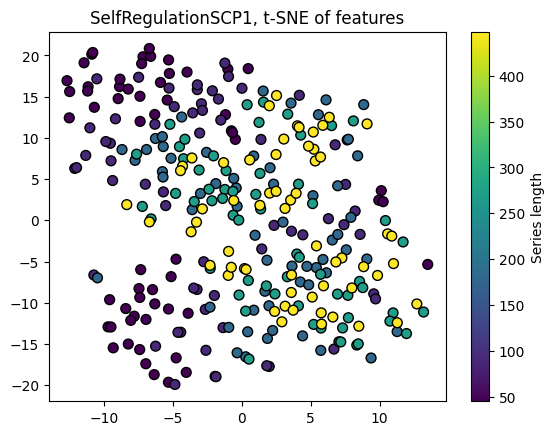

In [69]:
@dataclass
class Config:
    epsilon: float = 1.0
    distance_func: str = 'euclidean'
    memory_efficient: bool = True
    seq_len: int = 896
    enc_in: int = 6
    num_class: int = 2
    pool: str = 'max'
    sbm_cls: str = 'linear'
    dropout: float = 0.0
    lambda_div: float = 0.1
    lambda_reg: float = 0.1

config = Config()

path_large = 'checkpoints/SBM/SelfRegulationSCP1/dnn-FCN_seed-0_k-10_div-0.1_reg-0.1_eps-1.0_beta-constant_dfunc-euclidean_cls-linear'
                            
model_large =  ShapeBottleneckModel(num_shapelet=[10, 10, 10, 10, 10, 10], shapelet_len=[0.05, 0.1, 0.2, 0.3, 0.5, 0.8], pool='max', configs=config).eval()
model_large.load_state_dict(torch.load(f"{path_large}/checkpoint.pth"))

shapelets = []
for i in range(5):
    sh = model_large.shapelets[i].weights
    for j in range(10):
        for ch in range(6):
            shapelets.append(sh[j, ch, :].cpu().detach().numpy())
print(f'total {len(shapelets)} shapelets')

def z_norm(x):
    s = x.std()
    return (x - x.mean())/s if s > 0 else x*0

Xn = [z_norm(x) for x in shapelets]
feat = np.vstack([catch22_all(x)['values'] for x in Xn])
lengths = np.array([len(x) for x in Xn])[:, None]
F = feat
scaler = StandardScaler()
Z = scaler.fit_transform(F)

Y = TSNE(perplexity=30, random_state=0).fit_transform(Z)
plt.figure()
sc = plt.scatter(Y[:,0], Y[:,1], c=lengths.ravel(), s=50, edgecolor='k', cmap="viridis")
plt.colorbar(sc, label="Series length")
# for i, lab in enumerate(labels):
#     if lab == -1: plt.scatter(Y[i,0], Y[i,1], s=80, facecolors='none', edgecolors='r')  # highlight noise
plt.title("SelfRegulationSCP1, t-SNE of features")
plt.show()

total 350 shapelets


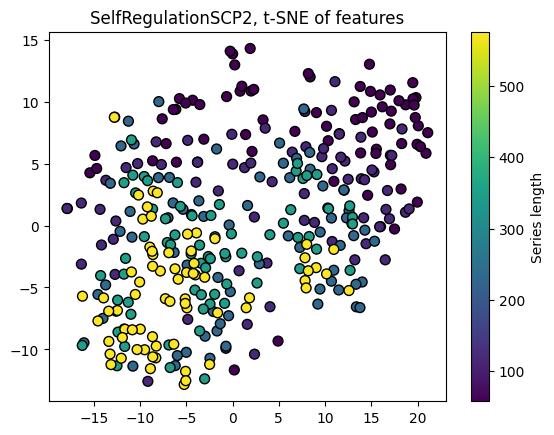

In [70]:
@dataclass
class Config:
    epsilon: float = 1.0
    distance_func: str = 'euclidean'
    memory_efficient: bool = True
    seq_len: int = 1152
    enc_in: int = 7
    num_class: int = 2
    pool: str = 'max'
    sbm_cls: str = 'linear'
    dropout: float = 0.0
    lambda_div: float = 0.1
    lambda_reg: float = 0.1

config = Config()

path_large = 'checkpoints/SBM/SelfRegulationSCP2/dnn-FCN_seed-0_k-10_div-0.1_reg-0.1_eps-1.0_beta-constant_dfunc-euclidean_cls-linear'
                            
model_large =  ShapeBottleneckModel(num_shapelet=[10, 10, 10, 10, 10, 10], shapelet_len=[0.05, 0.1, 0.2, 0.3, 0.5, 0.8], pool='max', configs=config).eval()
model_large.load_state_dict(torch.load(f"{path_large}/checkpoint.pth"))

shapelets = []
for i in range(5):
    sh = model_large.shapelets[i].weights
    for j in range(10):
        for ch in range(7):
            shapelets.append(sh[j, ch, :].cpu().detach().numpy())
print(f'total {len(shapelets)} shapelets')

def z_norm(x):
    s = x.std()
    return (x - x.mean())/s if s > 0 else x*0

Xn = [z_norm(x) for x in shapelets]
feat = np.vstack([catch22_all(x)['values'] for x in Xn])
lengths = np.array([len(x) for x in Xn])[:, None]
F = feat
scaler = StandardScaler()
Z = scaler.fit_transform(F)

Y = TSNE(perplexity=30, random_state=0).fit_transform(Z)
plt.figure()
sc = plt.scatter(Y[:,0], Y[:,1], c=lengths.ravel(), s=50, edgecolor='k', cmap="viridis")
plt.colorbar(sc, label="Series length")
# for i, lab in enumerate(labels):
#     if lab == -1: plt.scatter(Y[i,0], Y[i,1], s=80, facecolors='none', edgecolors='r')  # highlight noise
plt.title("SelfRegulationSCP2, t-SNE of features")
plt.show()